# Simple linear regression

## Import the relevant libraries

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
# We can override the default matplotlib styles with those of Seaborn
import seaborn as sns
sns.set()

## Load the data

In [5]:
# Load the data from a .csv in the same folder
data = pd.read_csv('1.01. Simple linear regression.csv')

In [6]:
# Let's check what's inside this data frame
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [7]:
# This method gives us very nice descriptive statistics. We don't need this as of now, but will later on!
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


# Create your first regression

## Define the dependent and the independent variables

In [8]:
# Following the regression equation, our dependent variable (y) is the GPA
y = data['GPA']
# Similarly, our independent variable (x) is the SAT score
x1 = data['SAT']

## Explore the data

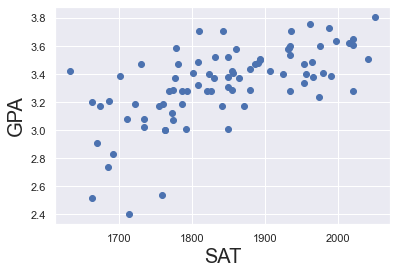

In [9]:
# Plot a scatter plot (first we put the horizontal axis, then the vertical axis)
plt.scatter(x1, y)
# Name the axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
# Show the plot
plt.show()

## Regression itself

In [7]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
result = sm.OLS(y, x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           7.20e-11
Time:                        17:54:05   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plot the regression line on the initial scatter

Text(0, 0.5, 'GPA')

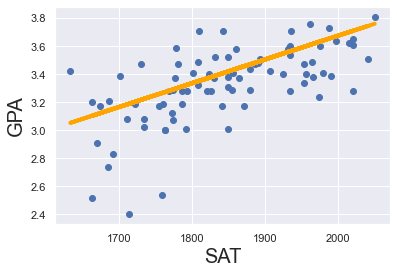

In [8]:
### Plot the regression line on the initial scatter# Create a scatter plot
plt.scatter(x1, y)
# Define the regression equation, so we can plot it later
yhat = 0.0017 * x1 + 0.2750
# yhat
# Plot the regression line against the independent variable (SAT)
plt.plot(x1, yhat, lw = 4, c = 'orange', label = 'regression line')
# Label the axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)

# Multiple Linear Regression - Exercise

# Dummy variables or how to deal with categorical predictors

## Load the data

In [9]:
# Load the data from a .csv in the same folder. Since we will do some preprocessing, the variable is not called 'data' just yet!
raw_data = pd.read_csv('1.03. Dummies.csv')

In [10]:
# Let's check what's inside this data frame
raw_data.head(10)

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
5,1670,2.91,No
6,1764,3.00,No
7,1764,3.00,No
8,1792,3.01,No
9,1850,3.01,No


## Map the data

In [11]:
# Map all 'No' entries with 0, and all 'Yes' entries with 1. Put that in a new variable called 'data'
# Note data is a copy of raw_data, because of how pointers in Python work
data = raw_data.copy()
data["Attendance"] = data["Attendance"].map({'Yes': 1, 'No': 0})
# Let's see what's inside
data.head(10)

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
5,1670,2.91,0
6,1764,3.00,0
7,1764,3.00,0
8,1792,3.01,0
9,1850,3.01,0


In [12]:
# This method gives us very nice descriptive statistics.
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


## Regression

In [13]:
# Following the regression equation, our dependent variable (y) is the GPA
y = data['GPA']
# Similarly, our independent variable (x) is the SAT score
x1 = data[['SAT', 'Attendance']]

In [14]:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y, x).fit()
# Print a nice summary of the regression.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           2.19e-15
Time:                        17:54:05   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Plot the regression line(s) on the scatter plot

Text(0, 0.5, 'GPA')

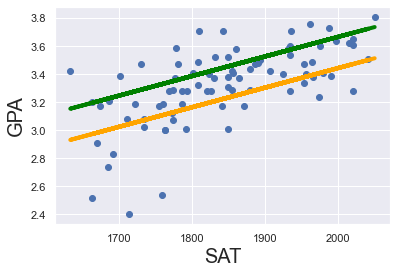

In [15]:
# Create a scatter plot of SAT and GPA
plt.scatter(data['SAT'], y)
# Define the two regression equations, depending on whether they attended (yes), or didn't (no)
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = (0.2226 + 0.6439) + 0.0014 * data['SAT']
# Plot the two regression lines
fig = plt.plot(data['SAT'], yhat_no, c = 'orange', lw = 4)
fig = plt.plot(data['SAT'], yhat_yes, c = 'green', lw = 4)
# Name your axes :)
plt.xlabel("SAT", fontsize = 20)
plt.ylabel("GPA", fontsize = 20)

## Plot the regression line(s) on the scatter plot and color the data points

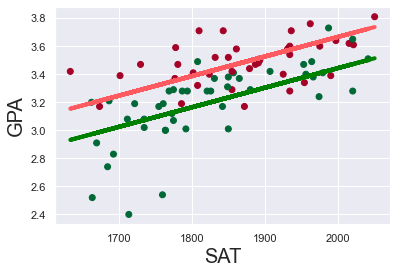

In [16]:
# In this code I want to colour the points depending on attendance
# Note: This code would have been very easy in Seaborn

# Create one scatter plot which contains all observations
# Use the series 'Attendance' as color, and choose a colour map of your choice
# The colour map we've chosen is completely arbitrary
plt.scatter(data['SAT'], data['GPA'], c = data['Attendance'], cmap = 'RdYlGn_r')

# Define the two regression equations (one with a dummy = 1, the other with dummy = 0)
# We have those above already, but for the sake of consistency, we will also include them here
fig = plt.plot(data['SAT'], yhat_no, c = 'green', lw = 4)
fig = plt.plot(data['SAT'], yhat_yes, c = '#FF5A60', lw = 4)

# Plot the two regression lines
plt.xlabel("SAT", fontsize = 20)
plt.ylabel("GPA", fontsize = 20)
plt.show()

## Add the original regression line

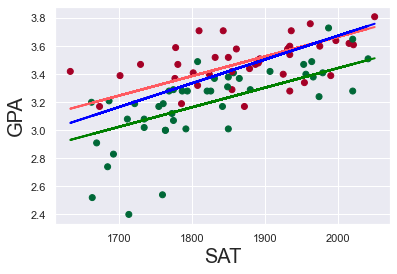

In [17]:
# Same as above, this time we are including the regression line WITHOUT the dummies.

# In this code I want to color the points depending on attendance
# Note: This code would have been very easy in Seaborn

# Create one scatter plot which contains all observations
# Use the series 'Attendance' as color, and choose a colour map of your choice
# The colour map we've chosen is completely arbitrary
plt.scatter(data['SAT'], data['GPA'], c = data['Attendance'], cmap = 'RdYlGn_r')

# Define the two regression equations (one with a dummy = 1, the other with dummy = 0)
# We have those above already, but for the sake of consistency, we will also include them here
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = (0.2226 + 0.6439) + 0.0014 * data['SAT']
# Original regression line
yhat = 0.0017 * data['SAT'] + 0.2750

# Plot the two regression lines
fig = plt.plot(data['SAT'], yhat_no, c = 'green', lw = 2, label = 'regression line 1')
fig = plt.plot(data['SAT'], yhat_yes, c = '#FF5A60', lw = 2, label = 'regression line 2')
# Plot the original regression line
fig = plt.plot(data['SAT'], yhat, c = 'blue', lw = 2, label = 'regression line 0')

plt.xlabel("SAT", fontsize = 20)
plt.ylabel("GPA", fontsize = 20)
plt.show()

# How to make predictions based on the regressions we create

In [18]:
# Let's see what's inside the independent variable. 
# The first column comes from the 'add_constant' method. It's only 1s, told ya! 
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [19]:
# Create a new data frame, identical in organization to X.
# The constant is always 1, while each of the lines corresponds to an observation (student)
new_data = pd.DataFrame({'const': 1, 'SAT': [1700, 1670], 'Attendance': [0, 1]})
# By default, when you create a df (not load, but create), the columns are sorted alphabetically
# So if we don't reorder them, they would be 'Attendance', 'const', 'SAT'
# If you feed them in the wrong order, you will get wrong results!
# Change column orders
# new_data = new_data[['const', 'Attendance', 'SAT']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [20]:
# I am renaming the indices for the purposes of this example.
# That's by not really a good practice => I won't overwrite the variable.
# If I want to use NumPy, sklearn, etc. methods on a df with renamed indices, they will simply be lost
# and returned to 0,1,2,3, etc.
new_data.rename(index = {0: 'Bob', 1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [21]:
# Use the predict method on the regression with the new data as a single argument
predict = results.predict(new_data)
# The result
predict

0    3.023513
1    3.204163
dtype: float64

In [22]:
# If we want we can create a data frame, including everything
predictionsdf = pd.DataFrame({'Predictions': predict})
# Join the two data frames
joined = new_data.join(predictionsdf)
# Rename the indices as before (not a good practice in general) 
joined.rename(index = {0: 'Bob', 1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163


# Multiple Linear Regression - Exercise

## Load the data

In [23]:
data = pd.read_csv('real_estate_price_size_year.csv')

In [24]:
data.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


In [25]:
data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


## Create the regression

### Declare the dependent and the independent variables

In [26]:
y = data['price']
x1 = data[['size', 'year']]

### Regression

In [27]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           2.77e-32
Time:                        17:54:06   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Multiple Linear Regression with Dummies - Exercise

## Load the data

In [28]:
raw_data = pd.read_csv('real_estate_price_size_year_view.csv')

In [29]:
raw_data.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [30]:
raw_data.describe(include='all')

,price,size,year,view
count,100.000000,100.000000,100.000000,100
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,No sea view
freq,NaN,NaN,NaN,51
mean,292289.470160,853.024200,2012.600000,NaN
std,77051.727525,297.941951,4.729021,NaN
min,154282.128000,479.750000,2006.000000,NaN
25%,234280.148000,643.330000,2009.000000,NaN
50%,280590.716000,696.405000,2015.000000,NaN
75%,335723.696000,1029.322500,2018.000000,NaN


## Create a dummy variable for 'view'

In [31]:
data = raw_data.copy()
data['view'] = data['view'].map({'Sea view': 1, 'No sea view': 0})

In [32]:
data.head()

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


## Create the regression

### Declare the dependent and the independent variables

In [33]:
y = data['price']
x1 = data[['size','year','view']]

### Regression

In [34]:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y, x).fit()
# Print a nice summary of the regression.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           1.02e-50
Time:                        17:54:06   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# SKLearn - Simple linear regression

## Import the relevant libraries

In [1]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

## Load the data

In [10]:
data = pd.read_csv('real_estate_price_size.csv')

In [11]:
data

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


## Create the regression

### Declare the dependent and the independent variables

In [12]:
x = data['size']
y = data['price']

### Explore the data

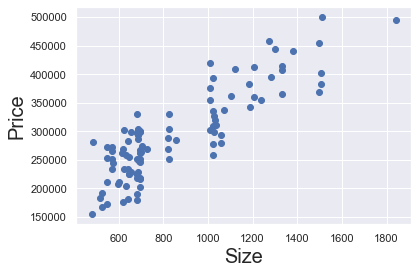

In [13]:
plt.scatter(x, y)
plt.xlabel('Size', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

### Transform the inputs into a matrix (2D object)

In [14]:
x_matrix = x.values.reshape(-1,1)

### Regression itself

In [15]:
reg = LinearRegression()
reg.fit(x_matrix, y)

LinearRegression()

### Calculate the R-squared

In [11]:
reg.score(x_matrix, y)

0.7447391865847587

### Find the intercept

In [12]:
reg.intercept_

101912.60180122915

### Find the coefficients

In [13]:
reg.coef_

array([223.17874259])

### Making predictions

You find an apartment online with a size of 750 sq.ft.

All else equal what should be its price according to the model?

In [14]:
reg.predict([[750]])

array([269296.65874718])

# SKLearn - Multiple linear regression

## Load the data

In [24]:
#data = pd.read_csv('1.02. Multiple linear regression.csv')
#data.head()
raw_data = pd.read_csv('real_estate_price_size_year_view.csv')
data = raw_data.copy()
data['view'] = data['view'].map({'Sea view': 1, 'No sea view': 0})
data.head()

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


In [25]:
data.describe()

,price,size,year,view
count,100.000000,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000,0.490000
std,77051.727525,297.941951,4.729021,0.502418
min,154282.128000,479.750000,2006.000000,0.000000
25%,234280.148000,643.330000,2009.000000,0.000000
50%,280590.716000,696.405000,2015.000000,0.000000
75%,335723.696000,1029.322500,2018.000000,1.000000
max,500681.128000,1842.510000,2018.000000,1.000000


## Create the multiple linear regression

### Declare the dependent and independent variables

In [26]:
#x = data[['SAT', 'Rand 1,2,3']]
#y = data['GPA']
x = data[['size', 'year', 'view']]
y = data['price']

### Regression itself

In [27]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [28]:
reg.coef_

array([  223.03161944,  2718.94888864, 56726.01979839])

In [29]:
reg.intercept_

-5397914.181560068

### Calculating the R-squared

In [22]:
r2 = reg.score(x, y)
r2

0.4066811952814282

### Formula for Adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

### Adjusted R^2 function

In [23]:
# There are different ways to solve this problem
# To make it as easy and interpretable as possible, we have preserved the original code
# n = number of data
# p = number of columns
n = x.shape[0]
p = x.shape[1]

adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.39203134825134

## Feature selection
Full documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html

In [25]:
## Feature selection
# Full documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html

# Import the feature selection module from sklearn
# This module allows us to select the most appopriate features for our regression
# There exist many different approaches to feature selection, however, we will use one of the simplest
from sklearn.feature_selection import f_regression

# We will look into: f_regression
# f_regression finds the F-statistics for the *simple* regressions created with each of the independent variables
# In our case, this would mean running a simple linear regression on GPA where SAT is the independent variable
# and a simple linear regression on GPA where Rand 1,2,3 is the indepdent variable
# The limitation of this approach is that it does not take into account the mutual effect of the two features
f_regression(x, y)

# There are two output arrays
# The first one contains the F-statistics for each of the regressions
# The second one contains the p-values of these F-statistics

# Since we are more interested in the latter (p-values), we can just take the second array
p_values = f_regression(x, y)[1]
p_values
# To be able to quickly evaluate them, we can round the result to 3 digits after the dot
p_values.round(3)

array([0.   , 0.676])

## How to (properly) include p-values in sklearn

In [37]:
# Since the p-values are obtained through certain statistics, we need the 'stat' module from scipy.stats
import scipy.stats as stat
from sklearn import linear_model
# Since we are using an object oriented language such as Python, we can simply define our own 
# LinearRegression class (the same one from sklearn)
# By typing the code below we will ovewrite a part of the class with one that includes p-values
# Here's the full source code of the ORIGINAL class: https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/linear_model/base.py#L362


class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """
    
    # nothing changes in __init__
    def __init__(self, fit_intercept = True, normalize = False, copy_X = True, n_jobs = 1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
        return
    
    def fit(self, X, y, n_jobs=1):
        #Super Function
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        # Calculate SSE (sum of squared errors)
        sse = np.sum((self.predict(X) - y) ** 2, axis = 0) / float(X.shape[0] - X.shape[1] - 1)
        # and SE (standard error)
        se = np.array(np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X)))))
        
        # compute the t-statistic for each feature
        self.t = self.coef_ / se
        # find the p-value for each feature
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        
        return self

In [38]:
# When we create the regression everything is the same
reg_pvalue = LinearRegression()
reg_pvalue.fit(x, y)

LinearRegression()

In [39]:
# The difference is that we can check what's contained in the local variable 'p' in an instance of the LinearRegression() class
reg_pvalue.p

array([0.        , 0.75860873])

In [40]:
# Let's create a new data frame with the names of the features
reg_summary = pd.DataFrame([['SAT'], ['Rand 1,2,3']], columns = ['Features'])
# Then we create and fill a second column, called 'Coefficients' with the coefficients of the regression
reg_summary['Coefficients'] = reg_pvalue.coef_
# Finally, we add the p-values we just calculated
reg_summary['p-Values'] = reg_pvalue.p

In [41]:
# This result is identical to the one from StatsModels
reg_summary

,Features,Coefficients,p-Values
0,SAT,0.001654,0.000000
1,"Rand 1,2,3",-0.008270,0.758609


Class & Function
object-oriented programming

In [43]:
class Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width
        
    def get_area(self):
        return self.length * self.width
    
    def get_perimeter(self):
        return 2 * (self.length + self.width)

In [44]:
r = Rectangle(160, 120)
print(r.get_area())
print(r.get_perimeter())

19200
560


## Standardization

In [46]:
# Import the preprocessing module
# StandardScaler is one of the easiest and 'cleanest' ways to preprocess your data
from sklearn.preprocessing import StandardScaler

In [47]:
# Create an instance of the StandardScaler class
scaler = StandardScaler()

In [48]:
# Fit the input data (x)
# Essentially we are calculating the mean and standard deviation feature-wise 
# (the mean of 'SAT' and the standard deviation of 'SAT', 
# as well as the mean of 'Rand 1,2,3' and the standard deviation of 'Rand 1,2,3')
scaler.fit(x)

StandardScaler()

In [50]:
# The actual scaling of the data is done through the method 'transform()'
# Let's store it in a new variable, named appropriately
x_scaled = scaler.transform(x)

In [51]:
# The result is an ndarray
x_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

## Regression with scaled features

In [53]:
# Creating a regression works in the exact same way
reg = LinearRegression()

# We just need to specify that our inputs are the 'scaled inputs'
reg.fit(x_scaled, y)

LinearRegression()

In [54]:
# Let's see the coefficients
reg.coef_

array([ 0.17181389, -0.00703007])

In [55]:
# And the intercept
reg.intercept_

3.330238095238095

## Creating a summary table

In [57]:
# As usual we can try to arrange the information in a summary table
# Let's create a new data frame with the names of the features
reg_summary = pd.DataFrame([['Bias'], ['SAT'], ['Rand 1,2,3']], columns = ['Features'])

# Then we create and fill a second column, called 'Weights' with the coefficients of the regression
# Since the standardized coefficients are called 'weights' in ML, this is a much better word choice for our case
# Note that even non-standardized coeff. are called 'weights' 
# but more often than not, when doing ML we perform some sort of scaling
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]

In [58]:
# Now we have a pretty clean summary, which can help us make an informed decision about the importance of each feature
reg_summary

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


## Making predictions with the standardized coefficients (weights)

In [59]:
# For simplicity, let's crete a new dataframe with 2 *new* observations
new_data = pd.DataFrame([[1700, 1], [1620, 2]], columns = ['SAT', 'Rand 1,2,3'])
new_data

,SAT,"Rand 1,2,3"
0,1700,1
1,1620,2


In [60]:
# We can make a prediction for a whole dataframe (not a single value)
# Note that the output is very strange (different from mine)
reg.predict(new_data)

array([295.40682569, 281.65468421])

In [61]:
# Our model is expecting SCALED features (features of different magnitude)
# In fact we must transform the 'new data' in the same way as we transformed the inputs we train the model on
# Luckily for us, this information is contained in the 'scaler' object
# We simply transform the 'new data' using the relevant method
scaler.transform(new_data)

# Let's check the result


array([[-1.39811928, -1.24637147],
       [-2.16804156, -0.07002087]])

In [62]:
# Finally we make a prediction using the scaled new data
reg.predict(scaler.transform(new_data))
# The output is much more appropriate, isn't it?

array([3.09878385, 2.95823069])

## What if we removed the 'Random 1,2,3' variable?

In [63]:
# Theory suggests that features with very small weights could be removed and the results should be identical
# Moreover, we proved in 2-3 different ways that 'Rand 1,2,3' is an irrelevant feature
# Let's create a simple linear regression (simple, because there is a single feature) without 'Rand 1,2,3'
reg_simple = LinearRegression()

# Once more, we must reshape the inputs into a matrix, otherwise we will get a compatibility error 
# Note that instead of standardizing again, I'll simply take only the first column of x
x_simple_matrix = x_scaled[:,0].reshape(-1,1)

# Finally, we fit the regression
reg_simple.fit(x_simple_matrix, y)

LinearRegression()

In [64]:
# In a similar manner to the cell before, we can predict only the first column of the scaled 'new data'
# Note that we also reshape it to be exactly the same as x
reg_simple.predict(scaler.transform(new_data)[:,0].reshape(-1,1))

array([3.08970998, 2.95725494])